# Load Data & Preliminary Evaluation

In [1]:
import kagglehub

dataset_dir = kagglehub.dataset_download("cashbowman/ai-generated-images-vs-real-images")

print("Path to dataset files:", dataset_dir)

Path to dataset files: /kaggle/input/ai-generated-images-vs-real-images


In [2]:
import os
from PIL import Image
from transformers import pipeline
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

pipe = pipeline("image-classification", model="umm-maybe/AI-image-detector")

gt_label_map = {
    "RealArt": "human",
    "AiArtData": "artificial"
}

y_true = []
y_pred = []

natural_misclassified_as_ai = []
natural_correctly_classified = []
ai_misclassified_as_natural = []
ai_correctly_classified = []

total_files = 0

for folder in os.listdir(dataset_dir):
    folder_path = os.path.join(dataset_dir, folder)
    if not os.path.isdir(folder_path):
        continue

    true_label = gt_label_map.get(folder)
    if true_label is None:
        print(f"Warning: Unrecognized folder {folder}, skipping.")
        continue

    for root, _, files in os.walk(folder_path):
        for fname in files:
            img_path = os.path.join(root, fname)
            try:
                image = Image.open(img_path).convert("RGB")
            except Exception as e:
                print(f"Skipping {img_path}: {e}")
                continue

            result = pipe(image)
            predicted_label = result[0]['label']

            y_true.append(true_label)
            y_pred.append(predicted_label)

            if true_label == 'human':
                if predicted_label == 'artificial':
                    natural_misclassified_as_ai.append(img_path)
                else:
                    natural_correctly_classified.append(img_path)
            else:
                if predicted_label == 'human':
                    ai_misclassified_as_natural.append(img_path)
                else:
                    ai_correctly_classified.append(img_path)

            total_files += 1
            if total_files % 10 == 0:
                print(f"  Processed {total_files} images so far...")

print(f"\nFinished processing {total_files} images.")

print(f"\nnatural_misclassified_as_ai:\n{natural_misclassified_as_ai}")
print(f"\nnatural_correctly_classified:\n{natural_correctly_classified}")
print(f"\nai_misclassified_as_natural:\n{ai_misclassified_as_natural}")
print(f"\nai_correctly_classified:\n{ai_correctly_classified}")


output_dir = "/content/classification_results"
os.makedirs(output_dir, exist_ok=True)

def write_list(filename, data_list):
    with open(os.path.join(output_dir, filename), 'w') as f:
        for item in data_list:
            f.write(f"{item}\n")

write_list("natural_misclassified_as_ai.txt", natural_misclassified_as_ai)
write_list("natural_correctly_classified.txt", natural_correctly_classified)
write_list("ai_misclassified_as_natural.txt", ai_misclassified_as_natural)
write_list("ai_correctly_classified.txt", ai_correctly_classified)

print(f"Results written to: {output_dir}")

accuracy = accuracy_score(y_true, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/937 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/348M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/240 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cpu


model.safetensors:   0%|          | 0.00/347M [00:00<?, ?B/s]

  Processed 10 images so far...
  Processed 20 images so far...
  Processed 30 images so far...
  Processed 40 images so far...
  Processed 50 images so far...
  Processed 60 images so far...
  Processed 70 images so far...
  Processed 80 images so far...
  Processed 90 images so far...
  Processed 100 images so far...
  Processed 110 images so far...
  Processed 120 images so far...
  Processed 130 images so far...
  Processed 140 images so far...
  Processed 150 images so far...
  Processed 160 images so far...


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


  Processed 170 images so far...
  Processed 180 images so far...
  Processed 190 images so far...
  Processed 200 images so far...
  Processed 210 images so far...
  Processed 220 images so far...
  Processed 230 images so far...
  Processed 240 images so far...
  Processed 250 images so far...
  Processed 260 images so far...
  Processed 270 images so far...
  Processed 280 images so far...
  Processed 290 images so far...
  Processed 300 images so far...
  Processed 310 images so far...
  Processed 320 images so far...
  Processed 330 images so far...
  Processed 340 images so far...
  Processed 350 images so far...
  Processed 360 images so far...
  Processed 370 images so far...
  Processed 380 images so far...
  Processed 390 images so far...
  Processed 400 images so far...
  Processed 410 images so far...
  Processed 420 images so far...
  Processed 430 images so far...
  Processed 440 images so far...
  Processed 450 images so far...
  Processed 460 images so far...
  Processe

# LIME Test

In [1]:
!pip install transformers lime scikit-image matplotlib pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=9c5b6bdaa0acd478e551c86929ad510494a8a23372cbbd899c9144eaf6c2ec60
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage.segmentation import mark_boundaries, slic
from skimage.io import imread

from transformers import pipeline
from lime import lime_image

Device set to use cpu


  0%|          | 0/500 [00:00<?, ?it/s]

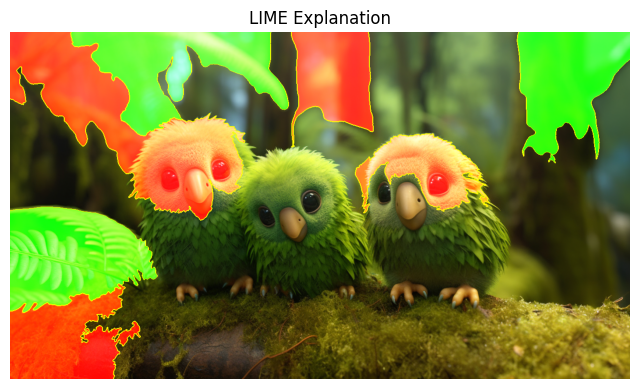

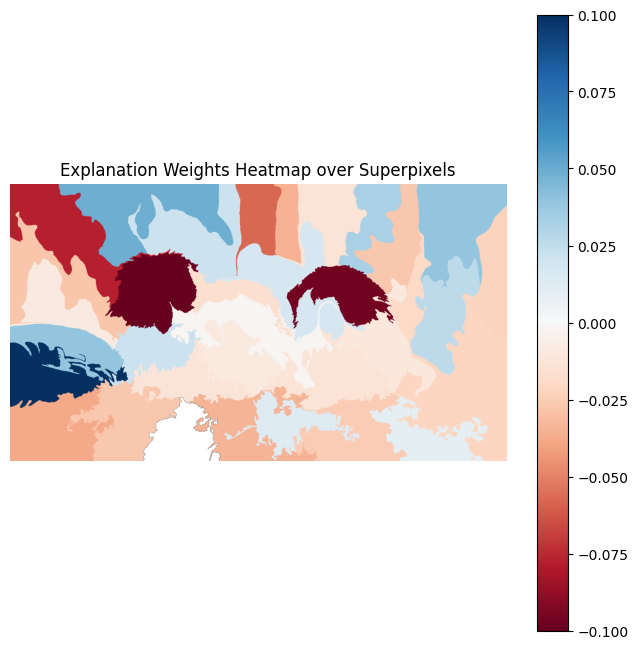

In [4]:
pipe = pipeline("image-classification", model="umm-maybe/AI-image-detector")
class_names = ['human', 'artificial']


def predict_fn(images):
    """
    images: list of numpy arrays (H, W, 3), values 0-255
    returns: numpy array (n_samples, n_classes) of probabilities
    """
    outputs = []
    for img_array in images:
        pil_img = Image.fromarray(img_array.astype(np.uint8))
        preds = pipe(pil_img)
        prob_dict = {p['label']: p['score'] for p in preds}
        probs = [prob_dict.get(name, 0.0) for name in class_names]
        outputs.append(probs)
    return np.array(outputs)


image_path = '/content/birds_fake.png'

image_np = imread(image_path)
if image_np.dtype != np.uint8:
    print(f"Image loaded as {image_np.dtype}, converting to uint8")
    image_np = (image_np * 255).astype(np.uint8)

image = Image.fromarray(image_np).convert("RGB")
image_np = np.array(image)


explainer = lime_image.LimeImageExplainer()

explanation = explainer.explain_instance(
    image_np,
    classifier_fn=predict_fn,
    top_labels=1,
    hide_color=0,
    num_samples=500,
    segmentation_fn=lambda img: slic(img, n_segments=50, compactness=10, sigma=1),
    random_seed=0
)


temp, mask = explanation.get_image_and_mask(
    label=explanation.top_labels[0],
    positive_only=False,
    hide_rest=False,
    num_features=10
)

plt.figure(figsize=(8, 8))
plt.imshow(mark_boundaries(temp, mask))
plt.axis("off")
plt.title("LIME Explanation")
plt.show()


ind = explanation.top_labels[0]
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments)

plt.figure(figsize=(8, 8))
plt.imshow(heatmap, cmap='RdBu', vmin=-np.max(np.abs(heatmap)), vmax=np.max(np.abs(heatmap)))
plt.colorbar()
plt.title("Explanation Weights Heatmap over Superpixels")
plt.axis("off")
plt.show()